In [1]:
import os

os.chdir('../src/')

from modules.dataProcessing import getJoinedData

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
jumboData = getJoinedData( 
                cachedFile='../data/intermediate/jumboData_cleansed_engineered.snappy.parquet'
            )   ## Data will be fetched if cached file is not found

In [3]:
jumboData[:5]

,capturedDate,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,median_impressions,median_clicks,yearCaptured,YYYYMMCaptured
0,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3714868,Display,1,149.565425,48.0,0.0,0.0,12.0,0.0,2018,201809
1,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3715603,Display,1,291.516169,124.0,1.0,0.0,12.0,0.0,2018,201809
2,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3716560,Display,2,509.019147,415.0,0.0,0.0,12.0,0.0,2018,201809
3,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718685,Mobile,2,134.542628,218.0,0.0,0.0,12.0,0.0,2018,201809
4,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718702,Mobile,1,3.761886,1.0,0.0,0.0,12.0,0.0,2018,201809


In [4]:
jumboData[ jumboData['conversions'] == 1.0 ]

,capturedDate,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,median_impressions,median_clicks,yearCaptured,YYYYMMCaptured
8,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718754,Display,1,108.258821,88.0,0.0,1.0,12.0,0.0,2018,201809
70,2018-09-17,Finance,Indonesia,Bali,idn-ba-kuta,3718757,Mobile,1,5.660585,7.0,0.0,1.0,5.0,0.0,2018,201809
109,2018-09-17,Finance,Indonesia,Bali,idn-ba-tabanan,3718749,Mobile,1,27.847750,20.0,0.0,1.0,5.0,0.0,2018,201809
110,2018-09-17,Finance,Indonesia,Bali,idn-ba-tabanan,3718750,Display,1,26.048717,20.0,0.0,1.0,5.0,0.0,2018,201809
128,2018-09-17,Finance,Indonesia,Bangka Belitung,idn-bb-air itam,3726250,Mobile,1,2.992500,1.0,0.0,1.0,1.0,0.0,2018,201809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74949,2018-09-17,Finance,Indonesia,Jawa Barat,idn-jb-tasikmalaya,3718757,Mobile,1,87.170784,120.0,0.0,1.0,8.0,0.0,2018,201809
74989,2018-09-17,Finance,Indonesia,Jawa Tengah,idn-jt-boyolali,3718749,Mobile,1,7.703873,10.0,0.0,1.0,5.0,0.0,2018,201809
75076,2018-09-17,Finance,Indonesia,Jawa Tengah,idn-jt-kebumen,3716560,Display,2,61.069402,44.0,0.0,1.0,5.0,0.0,2018,201809
75087,2018-09-17,Finance,Indonesia,Jawa Tengah,idn-jt-kendal,3718750,Display,1,1.596000,1.0,0.0,1.0,5.0,0.0,2018,201809


In [5]:
def getCountStr(pdSeries, colname):
    vcounts   = pdSeries.fillna('NA').value_counts().reset_index()
    vcounts.columns = [colname, 'nCounts']
    listOfTup = tuple(zip(vcounts[colname], vcounts['nCounts']))
    countStr  = ';; '.join([ '{}: {}'.format(tup[0], tup[1]) for tup in listOfTup ])
    return countStr

def getDistinctCountStr(pdSeries, colname):
    vcounts   = pdSeries.fillna('NA').value_counts().reset_index()
    distinctCountStr = len(vcounts)
    return distinctCountStr

In [6]:
strategyToCountry  = jumboData.groupby('strategy_id')['country'].apply( lambda x: getCountStr(x, 'country') ).reset_index()

In [7]:
strategyToChannel  = jumboData.groupby('strategy_id')['channel_name'].apply( lambda x: getCountStr(x, 'channel_name') ).reset_index()

In [8]:
strategyToBusiness = jumboData.groupby('strategy_id')['business_vertical'].apply( lambda x: getCountStr(x, 'business_vertical') ).reset_index()

In [9]:
strategyToGoalType = jumboData.groupby('strategy_id')['goal_type'].apply( lambda x: getCountStr(x, 'goal_type') ).reset_index()

In [10]:
strategyToDate = jumboData.groupby('strategy_id')['capturedDate'].apply( lambda x: getCountStr(x, 'capturedDate') ).reset_index()
strategyToDateCount = jumboData.groupby('strategy_id')['capturedDate'].apply( lambda x: getDistinctCountStr(x, 'capturedDate') ).reset_index()
strategyToDateCount.columns = ['strategy_id', 'dateCount']
strategyToDateCount = pd.merge( strategyToDateCount, strategyToDate, on='strategy_id', how='inner' )

In [38]:
strategyToDateCount[ strategyToDateCount['dateCount'] <= 2 ]

,strategy_id,dateCount,capturedDate
0,3714868,2,2018-09-17: 242;; 2018-09-18: 202
29,3784430,2,2018-10-03: 16;; 2018-10-04: 16
32,3784436,2,2018-10-03: 16;; 2018-10-04: 16
34,3784438,2,2018-10-03: 16;; 2018-10-04: 15
39,3784683,2,2018-10-03: 16;; 2018-10-04: 16
40,3784685,2,2018-10-04: 16;; 2018-10-03: 15
42,3793585,2,2018-10-03: 17;; 2018-10-04: 17
43,3793586,2,2018-10-04: 17;; 2018-10-03: 16
44,3793588,2,2018-10-04: 17;; 2018-10-03: 16
45,3793594,2,2018-10-03: 16;; 2018-10-04: 16


In [11]:
country_region_channel_Strategy = jumboData.groupby(['country', 'region', 'channel_name'])['strategy_id'].apply( lambda x: getCountStr(x, 'strategy_id') ).reset_index()
country_region_channel_StrategyCount = jumboData.groupby(['country', 'region', 'channel_name'])['strategy_id'].apply( lambda x: getDistinctCountStr(x, 'strategy_id') ).reset_index()
country_region_channel_StrategyCount.columns = ['country', 'region', 'channel_name', 'strategyCount']
country_region_channel_StrategyCount = pd.merge( country_region_channel_StrategyCount, country_region_channel_Strategy, on=['country', 'region', 'channel_name'], how='inner' )

In [12]:
country_region_channel_date = jumboData.groupby(['country', 'region', 'channel_name'])['capturedDate'].apply( lambda x: getCountStr(x, 'capturedDate') ).reset_index()
country_region_channel_dateCount = jumboData.groupby(['country', 'region', 'channel_name'])['capturedDate'].apply( lambda x: getDistinctCountStr(x, 'capturedDate') ).reset_index()
country_region_channel_dateCount.columns = ['country', 'region', 'channel_name', 'dateCount']
country_region_channel_dateCount = pd.merge( country_region_channel_dateCount, country_region_channel_date, on=['country', 'region', 'channel_name'], how='inner' )

In [13]:
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 200
country_region_channel_dateCount

,country,region,channel_name,dateCount,capturedDate
0,Australia,Australian Capital Territory,Display,8,2018-09-19: 15;; 2018-09-23: 14;; 2018-09-26: 13;; 2018-09-20: 13;; 2018-09-24: 13;; 2018-09-25: 12;; 2018-09-22: 12;; 2018-09-21: 7
1,Australia,Australian Capital Territory,Mobile,8,2018-09-19: 13;; 2018-09-24: 13;; 2018-09-22: 13;; 2018-09-26: 12;; 2018-09-25: 12;; 2018-09-20: 10;; 2018-09-23: 10;; 2018-09-21: 3
2,Australia,Australian Capital Territory,Unknown,9,2018-09-28: 40;; 2018-10-02: 39;; 2018-09-30: 28;; 2018-09-27: 27;; 2018-09-29: 24;; 2018-10-03: 23;; 2018-10-04: 21;; 2018-10-01: 11;; 2018-09-18: 6
3,Australia,New South Wales,Display,8,2018-09-24: 483;; 2018-09-25: 477;; 2018-09-23: 455;; 2018-09-19: 437;; 2018-09-20: 406;; 2018-09-22: 396;; 2018-09-26: 382;; 2018-09-21: 133
4,Australia,New South Wales,Mobile,8,2018-09-23: 483;; 2018-09-24: 424;; 2018-09-25: 408;; 2018-09-26: 377;; 2018-09-22: 358;; 2018-09-20: 330;; 2018-09-19: 288;; 2018-09-21: 69
5,Australia,New South Wales,Unknown,9,2018-10-02: 1180;; 2018-09-28: 1104;; 2018-10-03: 860;; 2018-09-29: 843;; 2018-10-04: 819;; 2018-09-30: 810;; 2018-09-27: 782;; 2018-10-01: 233;; 2018-09-18: 145
6,Australia,Northern Territory,Display,8,2018-09-22: 9;; 2018-09-20: 8;; 2018-09-19: 8;; 2018-09-26: 7;; 2018-09-24: 6;; 2018-09-23: 4;; 2018-09-25: 4;; 2018-09-21: 3
7,Australia,Northern Territory,Mobile,7,2018-09-22: 7;; 2018-09-26: 6;; 2018-09-20: 6;; 2018-09-19: 5;; 2018-09-24: 5;; 2018-09-25: 5;; 2018-09-23: 3
8,Australia,Northern Territory,Unknown,9,2018-10-02: 19;; 2018-09-29: 18;; 2018-10-03: 18;; 2018-09-28: 17;; 2018-10-04: 14;; 2018-09-30: 12;; 2018-09-27: 10;; 2018-10-01: 5;; 2018-09-18: 4
9,Australia,Queensland,Display,8,2018-09-20: 232;; 2018-09-19: 232;; 2018-09-26: 220;; 2018-09-25: 198;; 2018-09-22: 197;; 2018-09-23: 184;; 2018-09-24: 179;; 2018-09-21: 86


In [14]:
specificStrategy  = jumboData[ jumboData['strategy_id'] == 3718750 ].reset_index(drop=True)

In [15]:
specificStrategy[:5]

,capturedDate,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,median_impressions,median_clicks,yearCaptured,YYYYMMCaptured
0,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-banda aceh,3718750,Display,1,255.451460,157.0,0.0,0.0,12.0,0.0,2018,201809
1,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-jawa,3718750,Display,1,114.603316,45.0,0.0,0.0,12.0,0.0,2018,201809
2,2018-09-17,Finance,Indonesia,Aceh Sm,idn-ac-lhokseumawe,3718750,Display,1,102.865095,73.0,0.0,0.0,12.0,0.0,2018,201809
3,2018-09-17,Finance,Indonesia,Bali,idn-ba-banjar,3718750,Display,1,4.078849,1.0,0.0,0.0,5.0,0.0,2018,201809
4,2018-09-17,Finance,Indonesia,Bali,idn-ba-denpasar,3718750,Display,1,9238.309546,6189.0,5.0,0.0,5.0,0.0,2018,201809


In [16]:
categoricalCols = ['business_vertical', 'country', 'region', 'city_code', 'strategy_id', 'channel_name', 
                   'goal_type', 'yearCaptured', 'YYYYMMCaptured', 'conversions']
numericalCols   = ['total_spend_cpm', 'impressions', 'clicks']

In [17]:
temp = specificStrategy.groupby(['capturedDate', 'channel_name'])[['total_spend_cpm', 'impressions']].agg( sum ).reset_index()
temp['cpm_per_impression'] = temp['total_spend_cpm'] / temp['impressions']
temp

,capturedDate,channel_name,total_spend_cpm,impressions,cpm_per_impression
0,2018-09-17,Display,463862.505434,197192.0,2.352339
1,2018-09-18,Display,201243.566593,119522.0,1.683737
2,2018-09-19,Display,203623.895497,91236.5,2.231825
3,2018-09-20,Display,204765.582663,90373.0,2.265783
4,2018-09-21,Display,21794.295852,11997.0,1.816645
5,2018-09-22,Display,198388.239935,107174.0,1.851086
6,2018-09-23,Display,202547.144293,98551.0,2.055252
7,2018-09-24,Display,204546.858917,100863.0,2.027967
8,2018-09-25,Display,202624.123628,113659.0,1.782737
9,2018-09-26,Display,184531.694459,117059.0,1.576399


In [18]:
print('printing top 10 value counts for each categorical col..')
print('')

for c in categoricalCols:
    tmpDF         = specificStrategy[c].fillna('NA').value_counts().reset_index()
    tmpDF.columns = [c, 'nCounts']
    print('-'*15 + c + ' -> {}'.format(tmpDF.shape) + '-'*15)
    print(tmpDF[:10])
    print('')

printing top 10 value counts for each categorical col..

---------------business_vertical -> (2, 2)---------------
  business_vertical  nCounts
0           Finance     2081
1           Unknown      126

---------------country -> (2, 2)---------------
            country  nCounts
0         Indonesia     2206
1  reserved/private        1

---------------region -> (36, 2)---------------
             region  nCounts
0       Jawa Tengah      356
1        Jawa Timur      336
2        Jawa Barat      291
3      Jakarta Raya      261
4            Banten      117
5              Bali       87
6     Yogyakarta Jw       85
7  Sulawesi Selatan       54
8  Kalimantan Timur       50
9    Kepulauan Riau       49

---------------city_code -> (345, 2)---------------
           city_code  nCounts
0      idn-jt-jepara       12
1     idn-jb-cirebon       12
2        idn-jt-pati       12
3  idn-jb-purwakarta       12
4    idn-jt-magelang       12
5    idn-jt-semarang       12
6       idn-jb-depok       12
7

In [19]:
temp = specificStrategy[specificStrategy['channel_name']=='Unknown'].groupby(['city_code', 'capturedDate']).size().reset_index()
temp = temp.rename({0: 'nCounts'}, axis=1)
temp[temp['nCounts'] != 1]

,city_code,capturedDate,nCounts


In [20]:
specificStrategy_city = specificStrategy[specificStrategy['city_code']=='idn-ja-jambi'].reset_index(drop=True)
specificStrategy_city

,capturedDate,business_vertical,country,region,city_code,strategy_id,channel_name,goal_type,total_spend_cpm,impressions,clicks,conversions,median_impressions,median_clicks,yearCaptured,YYYYMMCaptured
0,2018-09-17,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,7.302084,5.0,0.0,0.0,1.0,0.0,2018,201809
1,2018-09-18,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,3.754875,1.0,0.0,0.0,1.0,0.0,2018,201809
2,2018-09-19,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,4.712787,2.0,0.0,0.0,1.0,0.0,2018,201809
3,2018-09-20,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,1.596024,1.0,0.0,0.0,1.0,0.0,2018,201809
4,2018-09-22,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,6.653610,2.0,0.0,0.0,1.0,0.0,2018,201809
5,2018-09-23,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,2.342700,0.0,0.0,0.0,1.0,0.0,2018,201809
6,2018-09-24,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,1.529130,0.0,0.0,0.0,1.0,0.0,2018,201809
7,2018-09-26,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,2.328450,1.0,0.0,0.0,1.0,0.0,2018,201809
8,2018-09-17,Finance,Indonesia,Jambi,idn-ja-jambi,3718750,Display,1,7.302084,5.0,0.0,0.0,1.0,0.0,2018,201809


In [27]:
strategyLastDate = jumboData.groupby('strategy_id')['capturedDate'].agg( max ).reset_index()
strategyLastDate = strategyLastDate.rename({'capturedDate': 'lastDate'}, axis=1).sort_values('lastDate').reset_index(drop=True)

In [28]:
strategyLastDate[:10]

,strategy_id,lastDate
0,3714868,2018-09-18
1,3726249,2018-09-21
2,3718754,2018-09-22
3,3726250,2018-09-23
4,3745968,2018-09-25
5,3734431,2018-09-25
6,3746268,2018-09-26
7,3746251,2018-09-26
8,3745856,2018-09-26
9,3734429,2018-09-26


In [35]:
strategyLastDate[strategyLastDate['strategy_id'] == 3718750]

,strategy_id,lastDate
16,3718750,2018-09-27


In [34]:
jumboData[ (jumboData['strategy_id'] == 3714868) & (jumboData['capturedDate'] <= datetime.date(2018, 9, 18)) ]

(444, 16)

In [32]:
jumboData[ jumboData['capturedDate'] < datetime.date(2018, 9, 18) ]['capturedDate'].value_counts()

2018-09-17    2499
Name: capturedDate, dtype: int64

In [22]:
dateJoined         = pd.merge(jumboData, strategyLastDate, on='strategy_id', how='left')
# dateJoined         = dateJoined[ dateJoined['country'] == 'Indonesia' ]
dateBeforeLastDate = dateJoined[ dateJoined['capturedDate'] != dateJoined['lastDate'] ]
dateOnLastDate     = dateJoined[ dateJoined['capturedDate'] == dateJoined['lastDate'] ]

(array([736952., 736954., 736956., 736958., 736960., 736962., 736964.,
        736966., 736968., 736970., 736972.]),
 <a list of 11 Text xticklabel objects>)

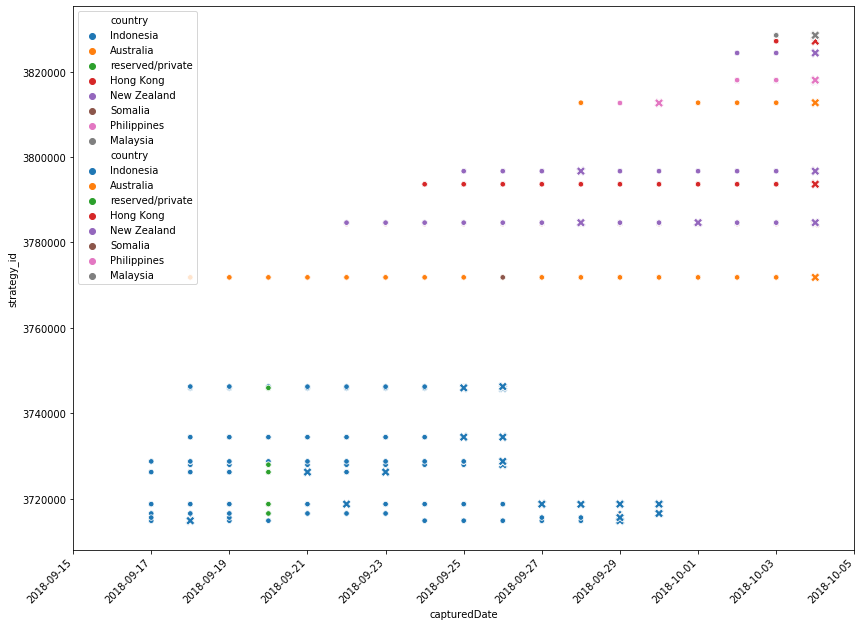

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
p1= sns.scatterplot(x='capturedDate', y='strategy_id', hue='country', marker="o", s=30, 
                    data=dateBeforeLastDate, ax=ax, 
                    hue_order=['Indonesia', 'Australia', 'reserved/private', 'Hong Kong', 
                               'New Zealand', 'Somalia', 'Philippines', 'Malaysia'] )
p2= sns.scatterplot(x='capturedDate', y='strategy_id', hue='country', marker="X", s=80, 
                    data=dateOnLastDate, ax=ax,
                    hue_order=['Indonesia', 'Australia', 'reserved/private', 'Hong Kong', 
                               'New Zealand', 'Somalia', 'Philippines', 'Malaysia'] )
p1.set_xlim(datetime.date(2018, 9, 15), datetime.date(2018, 10, 5))
# p1.set_ylim(3700000, 3900000)
plt.xticks(rotation=45, ha='right')

<img src="../results/modelling.png">